In [12]:
# Imports
from clases.red_rddas_model import RedRddasModel
from clases.experiment_model import ExperimentModel

import ray
import time
import pandas as pd
import numpy as np
import pickle  # library to serialization object

# Ray Configurations
# ray.shutdown()
# runtime_env = {"working_dir": "/home/reynaldo/Documents/RESEARCH/SynEstRDDA", "pip": ["requests", "pendulum==2.1.2"]}
# ray.init(address='ray://172.17.163.253:10001', runtime_env=runtime_env, log_to_driver=False)
# ray.init(address='ray://172.17.163.244:10001', runtime_env=runtime_env , log_to_driver=False, num_cpus=12)
#ray.init(log_to_driver=False, num_cpus=12)

In [13]:
# Parameters
n_rdds = 5
n_of_variables_rdda = 2
n_of_signals_rdda = 2
n_exit_variables = 2
n_clauses_function = 2
type_network = "ALEATORY"

# Generate the RDDA
o_rdda = RedRddasModel(number_of_rddas=n_rdds,number_of_variables_rdda=n_of_variables_rdda,number_of_signals_rdda=n_of_signals_rdda,number_exit_variables=n_exit_variables,number_clauses_function=n_clauses_function)

# Show the RDDA
o_rdda.show_description()

# Generate the RDDs
o_rdda.generate_rddas(type_network=type_network)

# Show the list of RDDs
o_rdda.show_rdds()

# Find the attractors by RDD
o_rdda = RedRddasModel.find_attractors_rddas(o_rdda)

# Show the attractors of the RDDs by Signal
o_rdda.show_attractors()

# Calculation the Attractor Pairs
o_rdda = RedRddasModel.calculation_compatible_pairs(o_rdda)

# Show the list of attractor pairs
o_rdda.show_attractor_pairs()

# Assembly the attractor fields
l_partial_paths = o_rdda.assembly_attractor_fields_pruning(o_rdda)

# Show the list of attractor fields
o_rdda.show_attractor_fields_detail()

NETWORK RDDA DESCRIPTION
Number of RDDs : 5
Number of variables by RDD : 2
Number of coupling signals by RDD : 2
Maximum number of exit variables by signal : 5
Maximum number of clauses by function : 5
List of RDDs of the RDDA
RDDA DESCRIPTION
Name of RDDA : 1
List of intern variables : 
[1, 2]
List of coupling signals : 
---------------
Network Input : 1
Network Output : 5
Variables : [10, 9]
Name Variable : 11
Coupling Function :  10 ∨ 9 
Truth Table: {'11': '1', '10': '1', '01': '1', '00': '0'}
---------------
---------------
Network Input : 1
Network Output : 2
Variables : [4, 3]
Name Variable : 12
Coupling Function :  4 ∨ 3 
Truth Table: {'11': '1', '10': '1', '01': '1', '00': '0'}
---------------
Description of Variables
V: 1 CNF :[[12, 11], [12, 11, 2]]
V: 2 CNF :[[11]]
RDDA DESCRIPTION
Name of RDDA : 2
List of intern variables : 
[3, 4]
List of coupling signals : 
---------------
Network Input : 2
Network Output : 3
Variables : [5, 6]
Name Variable : 13
Coupling Function :  5 ∨

In [14]:
# Tree pruning in the Assembly of attractor fields
# imports
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np

# Create Dictionary
d_pairs = {}
v_key = 1
for v_pair in o_rdda.list_attractors_pairs:
    d_pairs[v_key] = v_pair
    v_key = v_key + 1

# Show the dictionary and the
for v_key, v_value in d_pairs.items():
    print(v_key, ":", v_value)

# List all the partial paths in the assembly attractor fields method
l_path_edge = []
for l_path in l_partial_paths:
    for path in l_path:
        l_path_edge.append(path)

# Generate the graph with the paths
T = nx.Graph()
T.add_nodes_from(d_pairs.keys())
T.nodes

# fill the edges
l_edges_dict = []
for v_edge in l_path_edge:
    # print(v_edge[:2])
    v_aux_pair = v_edge[:2]
    print(v_aux_pair)
 #   v_a = list(d_pairs.keys())[list(d_pairs.values()).index(v_aux_pair[0])]
    v_a = list(d_pairs.keys())[list(d_pairs.values()).index(v_aux_pair[0])]
    print(v_a)
    v_b = list(d_pairs.keys())[list(d_pairs.values()).index(v_aux_pair[1])]
    print(v_b)
    l_edges_dict.append([v_a,v_b])
print(l_edges_dict)

1 : [0, 20]
2 : [0, 24]
3 : [1, 20]
4 : [1, 24]
5 : [2, 19]
6 : [2, 21]
7 : [2, 22]
8 : [2, 23]
9 : [2, 25]
10 : [2, 26]
11 : [3, 19]
12 : [3, 21]
13 : [3, 22]
14 : [3, 23]
15 : [3, 25]
16 : [3, 26]
17 : [0, 4]
18 : [0, 5]
19 : [1, 6]
20 : [1, 7]
21 : [1, 8]
22 : [1, 9]
23 : [2, 4]
24 : [2, 5]
25 : [3, 6]
26 : [3, 7]
27 : [3, 8]
28 : [3, 9]
29 : [4, 10]
30 : [5, 10]
31 : [6, 11]
32 : [6, 12]
33 : [6, 13]
34 : [7, 11]
35 : [7, 12]
36 : [7, 13]
37 : [8, 11]
38 : [8, 12]
39 : [8, 13]
40 : [9, 11]
41 : [9, 12]
42 : [9, 13]
43 : [4, 20]
44 : [4, 24]
45 : [5, 19]
46 : [5, 21]
47 : [5, 22]
48 : [5, 23]
49 : [5, 25]
50 : [5, 26]
51 : [6, 20]
52 : [6, 24]
53 : [7, 20]
54 : [7, 24]
55 : [8, 19]
56 : [8, 21]
57 : [8, 22]
58 : [8, 23]
59 : [8, 25]
60 : [8, 26]
61 : [9, 19]
62 : [9, 21]
63 : [9, 22]
64 : [9, 23]
65 : [9, 25]
66 : [9, 26]
67 : [10, 20]
68 : [10, 24]
69 : [11, 20]
70 : [11, 24]
71 : [12, 19]
72 : [12, 21]
73 : [12, 22]
74 : [12, 23]
75 : [12, 25]
76 : [12, 26]
77 : [13, 19]
78 : [13,

In [86]:
v_edge_ = np.array([np.apply_along_axis(lambda args : [complex(*args)], 1, item) for item in [np.array(value)[-2:] for value in l_path_edge]]).reshape(len(l_path_edge),2)
v_indexes_ = np.array([value[0]+1j*value[1] for value in d_pairs.values()])

In [ ]:
_,C = np.where(v_edge_ == b)

In [98]:
v_edge_[:,0]

array([ 0.+20.j,  0.+20.j,  0.+24.j,  0.+24.j,  1.+20.j,  1.+20.j,
        1.+20.j,  1.+20.j,  1.+24.j,  1.+24.j,  1.+24.j,  1.+24.j,
        2.+19.j,  2.+19.j,  2.+21.j,  2.+21.j,  2.+22.j,  2.+22.j,
        2.+23.j,  2.+23.j,  2.+25.j,  2.+25.j,  2.+26.j,  2.+26.j,
        3.+19.j,  3.+19.j,  3.+19.j,  3.+19.j,  3.+21.j,  3.+21.j,
        3.+21.j,  3.+21.j,  3.+22.j,  3.+22.j,  3.+22.j,  3.+22.j,
        3.+23.j,  3.+23.j,  3.+23.j,  3.+23.j,  3.+25.j,  3.+25.j,
        3.+25.j,  3.+25.j,  3.+26.j,  3.+26.j,  3.+26.j,  3.+26.j,
        0. +4.j,  0. +5.j,  0. +4.j,  0. +5.j,  1. +6.j,  1. +6.j,
        1. +6.j,  1. +7.j,  1. +7.j,  1. +7.j,  1. +8.j,  1. +8.j,
        1. +8.j,  1. +9.j,  1. +9.j,  1. +9.j,  1. +6.j,  1. +6.j,
        1. +6.j,  1. +7.j,  1. +7.j,  1. +7.j,  1. +8.j,  1. +8.j,
        1. +8.j,  1. +9.j,  1. +9.j,  1. +9.j,  2. +4.j,  2. +5.j,
        2. +4.j,  2. +5.j,  2. +4.j,  2. +5.j,  2. +4.j,  2. +5.j,
        2. +4.j,  2. +5.j,  2. +4.j,  2. +5.j,  3. +6.j,  3. +

In [102]:
v_edge_[:,0][v_edge_[:,0].argsort()][v_indexes_.argsort().argsort()]

array([0. +5.j, 0. +5.j, 1. +6.j, 1. +6.j, 1. +6.j, 1. +6.j, 1. +7.j,
       1. +7.j, 1. +7.j, 1. +7.j, 1. +8.j, 1. +8.j, 1. +8.j, 1. +8.j,
       1. +9.j, 1. +9.j, 0. +4.j, 0. +4.j, 0.+20.j, 0.+20.j, 0.+24.j,
       0.+24.j, 1. +6.j, 1. +6.j, 1. +7.j, 1. +7.j, 1. +8.j, 1. +8.j,
       1. +9.j, 1. +9.j, 1.+24.j, 1.+24.j, 2. +4.j, 2. +4.j, 2. +4.j,
       2. +4.j, 2. +5.j, 2. +5.j, 2. +5.j, 2.+22.j, 2.+23.j, 2.+23.j,
       1. +9.j, 1. +9.j, 1.+20.j, 1.+20.j, 1.+20.j, 1.+20.j, 1.+24.j,
       1.+24.j, 2. +4.j, 2. +4.j, 2. +5.j, 2. +5.j, 2. +5.j, 2.+19.j,
       2.+19.j, 2.+21.j, 2.+21.j, 2.+22.j, 2.+25.j, 2.+25.j, 2.+26.j,
       2.+26.j, 3. +6.j, 3. +6.j, 3. +6.j, 3. +6.j, 3. +6.j, 3. +6.j,
       3. +6.j, 3. +6.j, 3. +6.j, 3. +6.j, 3. +7.j, 3. +7.j, 3. +7.j,
       3. +7.j, 3. +7.j, 3. +7.j, 3. +7.j, 3. +7.j, 3. +6.j, 3. +6.j,
       3. +6.j, 3. +6.j, 3. +6.j, 3. +6.j, 3. +6.j, 3. +6.j, 3. +7.j,
       3. +7.j, 3. +7.j, 3. +7.j, 3. +7.j, 3. +7.j, 3. +7.j, 3. +7.j,
       3. +8.j, 3. +

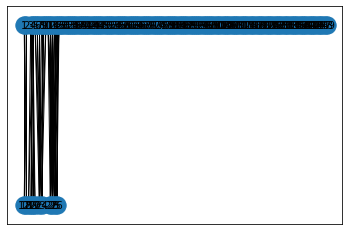

<Figure size 20000x10000 with 0 Axes>

In [16]:
# Tree pruning in the Assembly of attractor fields
# imports
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np

# Generate the graph with the paths
#T = nx.generators.balanced_tree(2, 5)

T = nx.Graph()
T.add_nodes_from(d_pairs.keys())
T.add_edges_from(l_edges_dict)
#
# L1 = [1]
# L2 = [x for x in range(2,5)]
# L3 = [x for x in range(6,20)]
#
# L4 = [21]
# L5 = [x for x in range(22,25)]
# L6 = [x for x in range(26,30)]
#
#
# T.add_node(1)
# T.add_nodes_from(L1)
# T.add_nodes_from(L2)
# T.add_nodes_from(L3)
# for i in range(2,5):
#     T.add_edge(1,i)
#     for j in range (6,20):
#         T.add_edge(i,j)
#
# T.add_node(21)
# T.add_nodes_from(L4)
# T.add_nodes_from(L5)
# T.add_nodes_from(L6)
# for i in range(22,25):
#     T.add_edge(21,i)
#     for j in range (26,40):
#         T.add_edge(i,j)

# Generate the Layout with dot
pos = graphviz_layout(T, prog="dot")
# Fix the position problem, string to int
aux_pos ={}
for key in pos.keys():
    aux_pos[int(key)] = pos[key]
pos = aux_pos
# Generate the graph with the data an information
nx.draw_networkx(T, pos, font_size=10)
# Show the graph with parameters
plt.figure(figsize=(200,100), dpi=100)
plt.show()